<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 135.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 72.3 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [3]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [4]:
## Write your code here
print(df["ConvertedCompYearly"].isna().sum()) 

42002


In [5]:
print(df["ConvertedCompYearly"].value_counts())

ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64


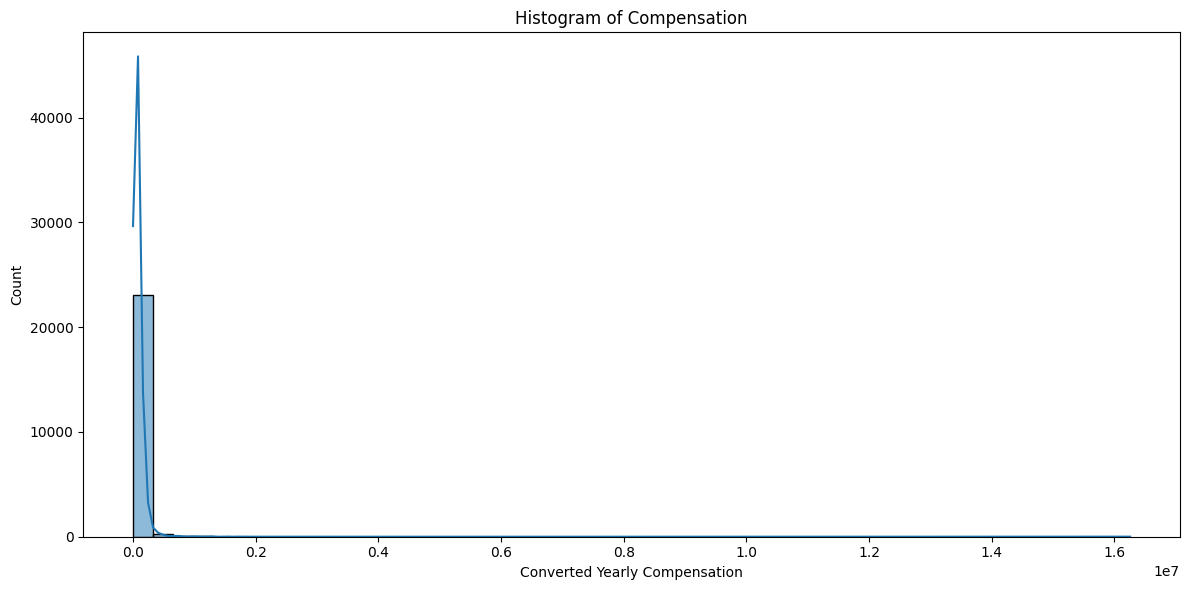

In [6]:
df_plot = df["ConvertedCompYearly"].dropna()
df_plot 

plt.figure(figsize=(12,6))
sns.histplot(df_plot, bins=50, kde=True )

plt.title("Histogram of Compensation")
plt.xlabel("Converted Yearly Compensation")
plt.ylabel("Count")

plt.tight_layout()
plt.show() 

In [14]:
df_plot.max()

np.float64(16256603.0)

In [8]:
Q1 = df_plot.quantile(0.25)
Q3 = df_plot.quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

df_plot_trimmed = df_plot[(df_plot >= lower_bound) & (df_plot <= upper_bound)] 

print(f"original size: {len(df_plot)}")
print(f"New size: {len(df_plot_trimmed)}") 

original size: 23435
New size: 22457


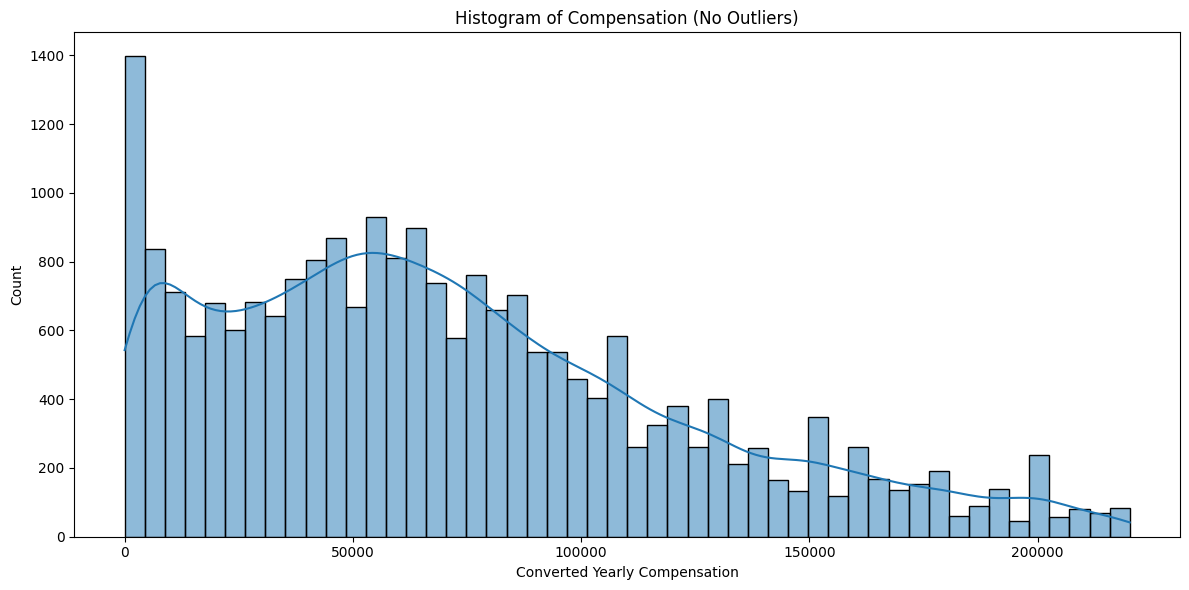

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(df_plot_trimmed, bins=50, kde=True )

plt.title("Histogram of Compensation (No Outliers)")
plt.xlabel("Converted Yearly Compensation")
plt.ylabel("Count")

plt.tight_layout()
plt.show() 

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [16]:
## Write your code here
medians = df.groupby("Employment")["ConvertedCompYearly"].median() 

median_comp = medians["Employed, full-time"]

median_comp

np.float64(69814.0)

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [25]:
## Write your code here 
comp_range = df[["ConvertedCompYearly", "Country"]]
comp_range_clean = comp_range.dropna()
comp_range_clean.isna().sum() 

ConvertedCompYearly    0
Country                0
dtype: int64

In [29]:
comp_range_xtab = pd.crosstab(comp_range_clean["ConvertedCompYearly"], comp_range_clean["Country"]) 
comp_range_xtab

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of...",Viet Nam,Yemen,Zambia,Zimbabwe
ConvertedCompYearly,,,,,,,,,,,,,,,,,,,,,
1.0,2,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936778.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6340564.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9000000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipykernel_300/2869117156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comp_range["Country"] = filtered_comp_range["Country"].str.replace("United Kingdom of Great Britain and Northern Ireland",


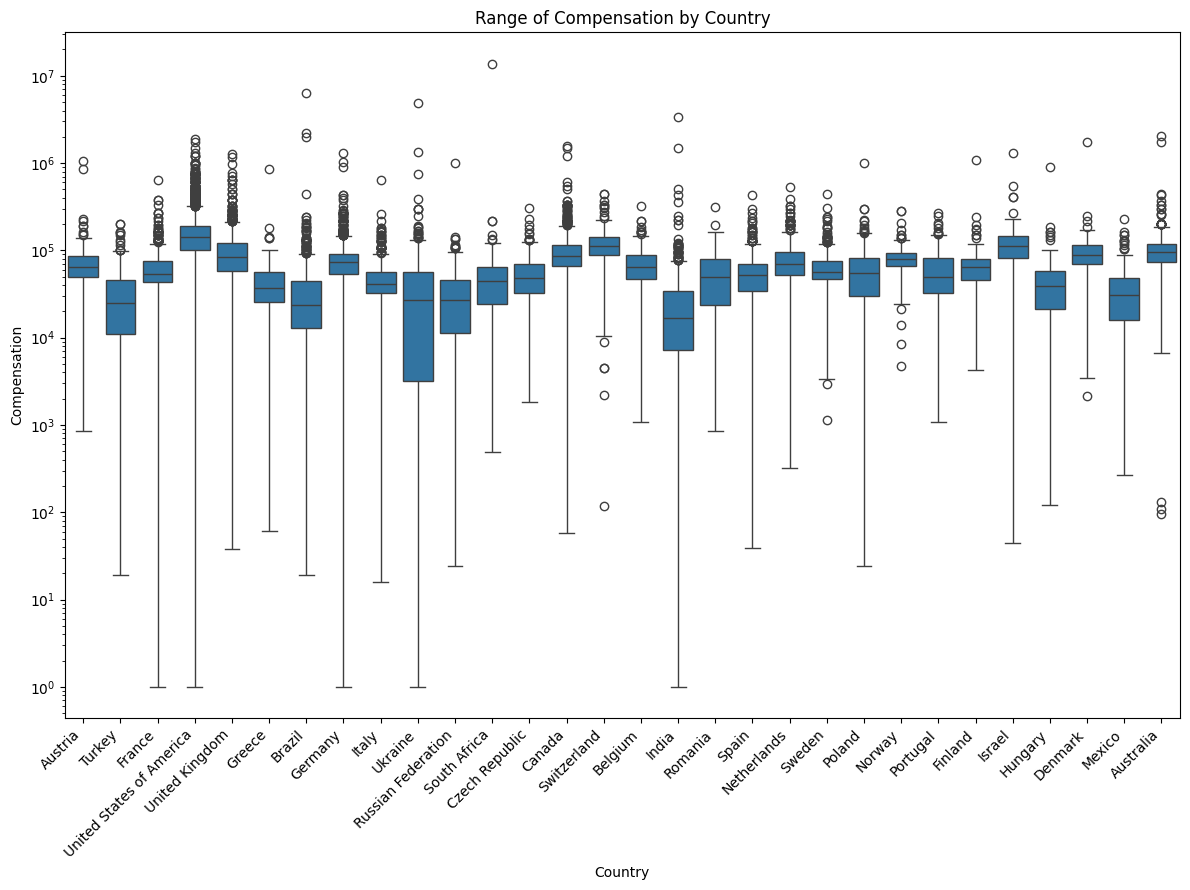

In [41]:
top_countries = comp_range_clean["Country"].value_counts().nlargest(30).index
filtered_comp_range = comp_range_clean[comp_range_clean["Country"].isin(top_countries)]

filtered_comp_range["Country"] = filtered_comp_range["Country"].str.replace("United Kingdom of Great Britain and Northern Ireland", 
                                                      "United Kingdom")


plt.figure(figsize=(12,9))
sns.boxplot(data = filtered_comp_range, x="Country", y="ConvertedCompYearly")

plt.title("Range of Compensation by Country")
plt.xlabel("Country")
plt.ylabel("Compensation")
plt.xticks(rotation=45, ha="right")
plt.yscale("log")

plt.tight_layout() 
plt.show() 

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [44]:
## Write your code here
#I already did this when I made the histogram, just reposting the result here :)

df_new = df.dropna(subset=["ConvertedCompYearly"])

Q1 = df_plot.quantile(0.25)
Q3 = df_plot.quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

df_plot_sheared = df_new[(df_new["ConvertedCompYearly"] >= lower_bound) & (df_new["ConvertedCompYearly"]  <= upper_bound)] 

print(f"original size: {len(df_plot)}")
print(f"New size: {len(df_plot_sheared)}") 

original size: 23435
New size: 22457


In [46]:
print(df_plot_sheared.dtypes)

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [47]:
## Write your code here
df2 = df_plot_sheared
numeric_col = df2[["ConvertedCompYearly", "WorkExp", "JobSatPoints_1"]] 

correlation_matrix = numeric_col.corr()

correlation_matrix 

,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.000000,0.408438,-0.058170
WorkExp,0.408438,1.000000,-0.032388
JobSatPoints_1,-0.058170,-0.032388,1.000000


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


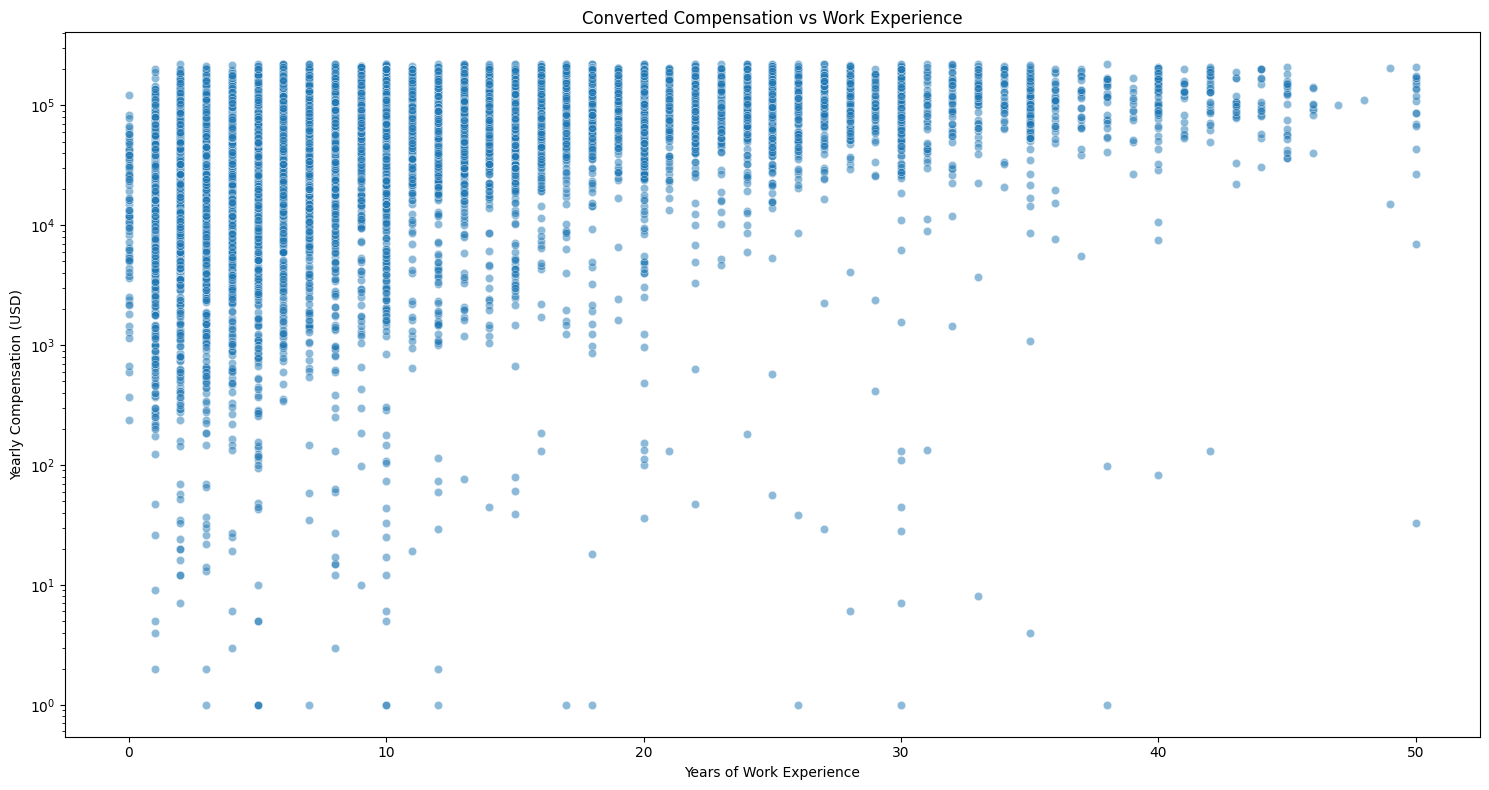

In [50]:
## Write your code here

plt.figure(figsize=(15, 8))
sns.scatterplot(data=numeric_col, x="WorkExp", y="ConvertedCompYearly", alpha=0.5)

plt.title("Converted Compensation vs Work Experience")
plt.xlabel("Years of Work Experience")
plt.ylabel("Yearly Compensation (USD)")
plt.yscale("log") 

plt.tight_layout()
plt.show()


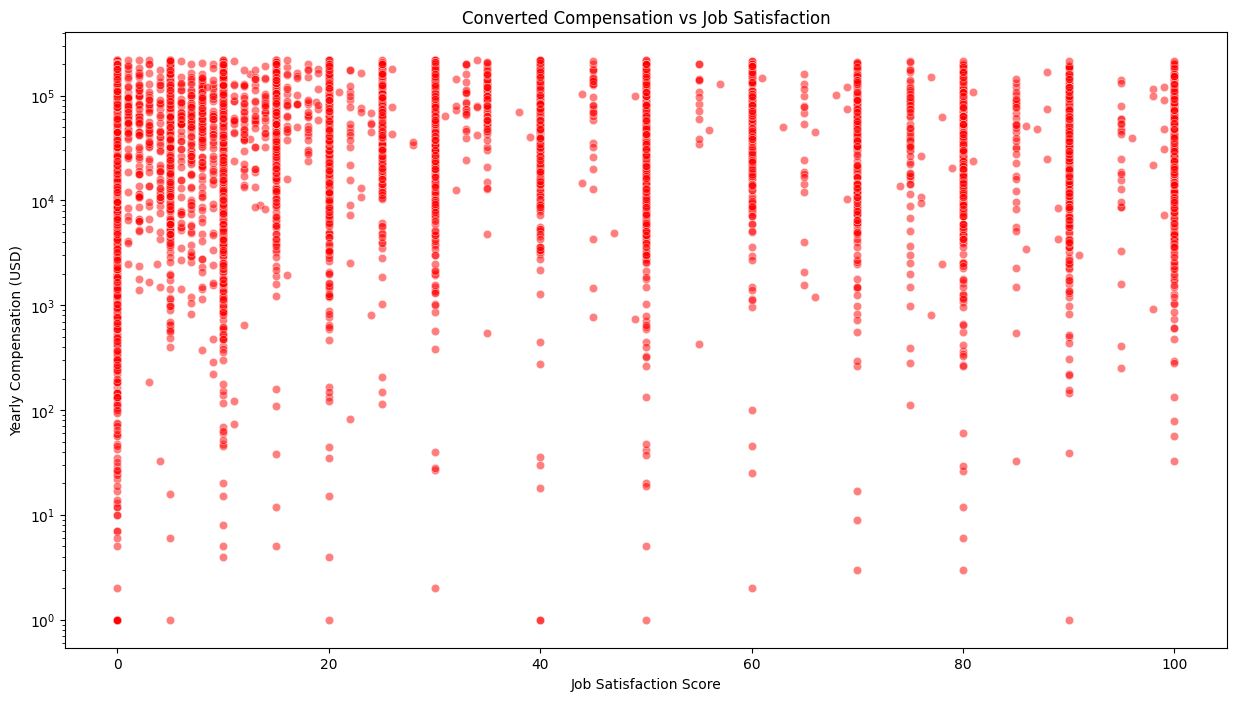

In [53]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=numeric_col, x="JobSatPoints_1", y="ConvertedCompYearly", alpha=0.5, color="red")

plt.title("Converted Compensation vs Job Satisfaction")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Yearly Compensation (USD)")
plt.yscale("log")

plt.tight_layout
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
